### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
data = pd.read_csv('/content/drive/MyDrive/data scient/online_retail_II.csv')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year

### Filtering Data

In [5]:
sales = data[(data['Quantity'] > 0) & (~data['Invoice'].str.contains('C'))]

### Create New Feature: Revenue

In [6]:
sales['Revenue'] = sales['Quantity'] * sales['Price']

<ipython-input-6-e0bf8ecdb27b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Revenue'] = sales['Quantity'] * sales['Price']


### Average of Revenue per Year

In [8]:
average_revenue_per_year = sales.groupby('Year')['Revenue'].mean()

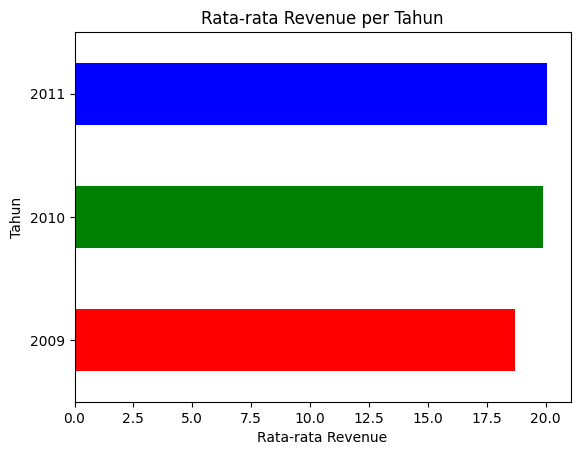

In [32]:
warna_bar = ['red', 'green', 'blue', 'yellow']
average_revenue_per_year.plot(kind='barh', color=warna_bar)
plt.title('Rata-rata Revenue per Tahun')
plt.xlabel('Rata-rata Revenue')
plt.ylabel('Tahun')
plt.show()

### Interpretation

Visualisasi bar chart menunjukkan rata-rata pendapatan (Revenue) per tahun dari data penjualan. Dari grafik tersebut, kita dapat melihat tren pendapatan rata-rata dari tahun ke tahun. Hal ini dapat membantu dalam mengevaluasi performa bisnis dari segi pendapatan selama beberapa tahun terakhir.

## Section 2

### Filtering Data

#### Customers who finished their purchases

In [43]:
finished = sales[sales['Customer ID'].notnull()]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

In [52]:
cancel = data[(data['Invoice'].str.contains("C"))].reset_index()
cancel

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
1,179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
2,180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
3,181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
4,182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...,...
19489,1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
19490,1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
19491,1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
19492,1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [45]:
finished_transactions_per_year = finished.groupby('Year').size()
cancel_transactions_per_year = cancel.groupby('Year').size()

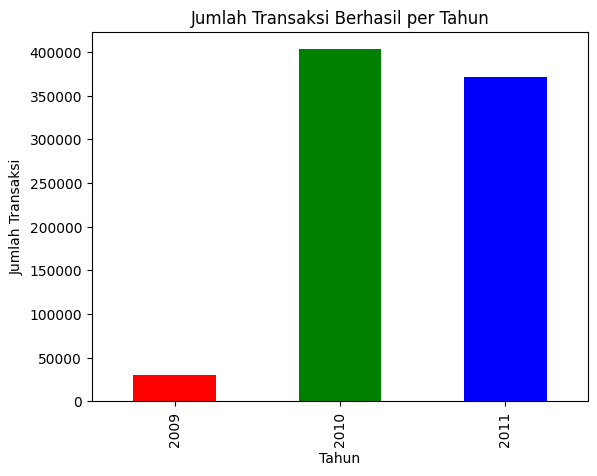

In [50]:
warna_bar = ['red', 'green', 'blue', 'yellow']
finished_transactions_per_year.plot(kind='bar', color=warna_bar)
plt.title('Jumlah Transaksi Berhasil per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.show()

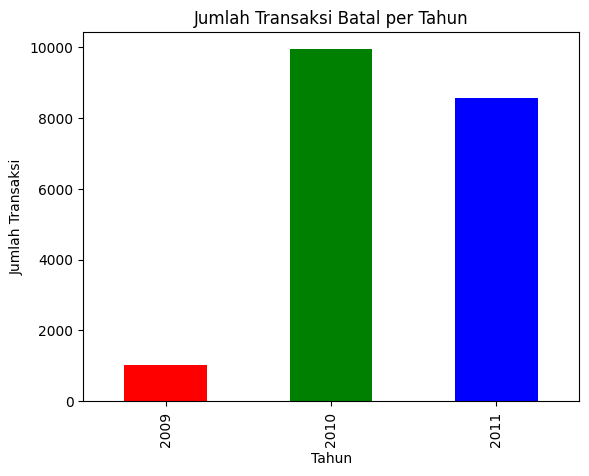

In [51]:
warna_bar = ['red', 'green', 'blue', 'yellow']
cancel_transactions_per_year.plot(kind='bar', color=warna_bar)
plt.title('Jumlah Transaksi Batal per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.show()

### Cancellation Rate

In [48]:
cancellation_rate_per_year = (cancel_transactions_per_year / (finished_transactions_per_year + cancel_transactions_per_year)) * 100
cancellation_rate_per_year

Year
2009    3.194235
2010    2.401619
2011    2.250707
dtype: float64

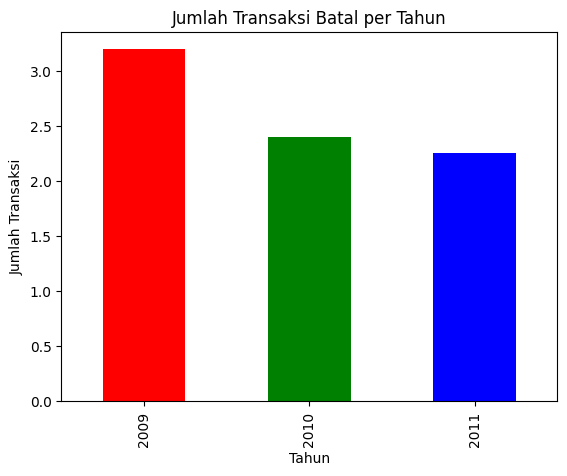

In [49]:
warna_bar = ['red', 'green', 'blue', 'yellow']
cancellation_rate_per_year.plot(kind='bar', color=warna_bar)
plt.title('Jumlah Transaksi Batal per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.show()

### Interpretation

Jumlah transaksi yang berhasil cenderung meningkat dari tahun ke tahun, sementara jumlah transaksi yang dibatalkan cenderung stabil atau menurun. Cancellation rate menunjukkan tren yang menurun, yang menunjukkan peningkatan kepuasan pelanggan dan penurunan tingkat pembatalan transaksi dari waktu ke waktu.